In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
import scipy.constants as cnst
import emcee
import corner

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
#mpl.rcParams['axes.spines.right'] = False
#mpl.rcParams['axes.spines.top'] = False

In [2]:
NOMI = np.array(["indice", "csi", "psi", "psi_p", "g_0", "f_0"])
table = Table.read('build/Bonnor-Ebert_Eulero.dat', names = NOMI,  format="ascii")
table

indice,csi,psi,psi_p,g_0,f_0
int64,float64,float64,float64,float64,float64
0,0.0001,0.0,0.0,0.9999,-0.0
1,0.0011,0.0,0.001,0.998901,-1.21e-09
2,0.0021,1e-06,0.000181818,0.997902,-8.01818e-10
3,0.0031,1.18182e-06,0.00100866,0.996905,-9.69319e-09
4,0.0041,2.19048e-06,0.00135791,0.995908,-2.28265e-08
5,0.0051,3.54838e-06,0.00169551,0.994913,-4.41003e-08
6,0.0061,5.2439e-06,0.0020306,0.993919,-7.55587e-08
7,0.0071,7.2745e-06,0.00236483,0.992925,-1.19211e-07
8,0.0081,9.63932e-06,0.00269867,0.991933,-1.7706e-07


In [3]:
ORDINE = {nome: i for i,nome in enumerate(NOMI)}

data = np.array( [ table[nome] for nome in NOMI  ] ).T

In [11]:
indici = data[:, ORDINE["indice"] ]
csis = data[:, ORDINE["csi"] ]
psis = data[:, ORDINE["psi"] ]
psis_p = data[:, ORDINE["psi_p"] ]
g0s = data[:, ORDINE["g_0"] ]
f0s = data[:, ORDINE["f_0"] ]

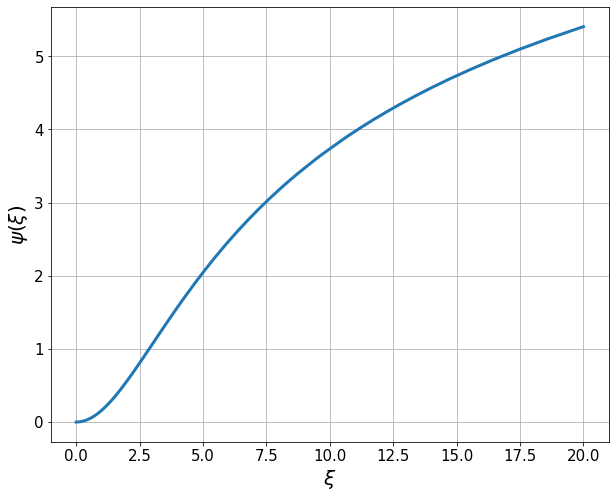

In [12]:
SIZE_ticks = 15
SIZE_labels = 20

fig = plt.figure(figsize=(10,8))

plt.plot(csis, psis, '-', lw=3)
plt.grid()
#plt.xticks(np.arange(14,20,1), size=SIZE_2)
#plt.yticks(np.arange(0,10,2), size=SIZE_2)
plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylabel(r'$\psi(\xi)$', size=SIZE_labels);

In [6]:
rho_norm = np.e**(-psis)

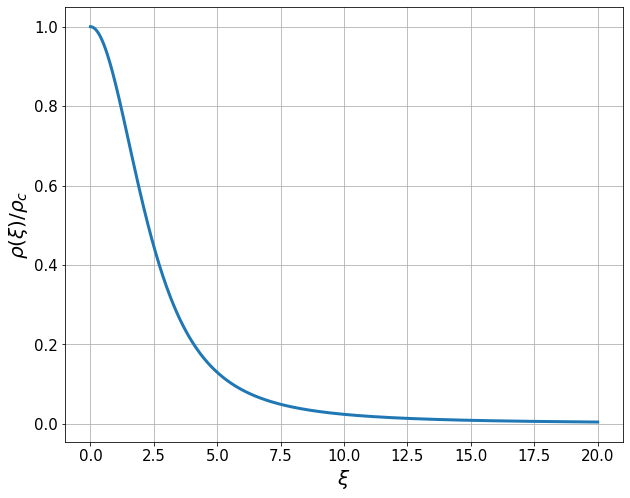

In [7]:
SIZE_ticks = 15
SIZE_labels = 20

fig = plt.figure(figsize=(10,8))

plt.plot(csis, rho_norm, '-', lw=3)
plt.grid()
#plt.xticks(np.arange(14,20,1), size=SIZE_2)
#plt.yticks(np.arange(0,10,2), size=SIZE_2)
plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylabel(r'$\rho(\xi)/\rho_c$', size=SIZE_labels);

In [8]:
a =[1,2,3,4,5]
a[2:]

[3, 4, 5]

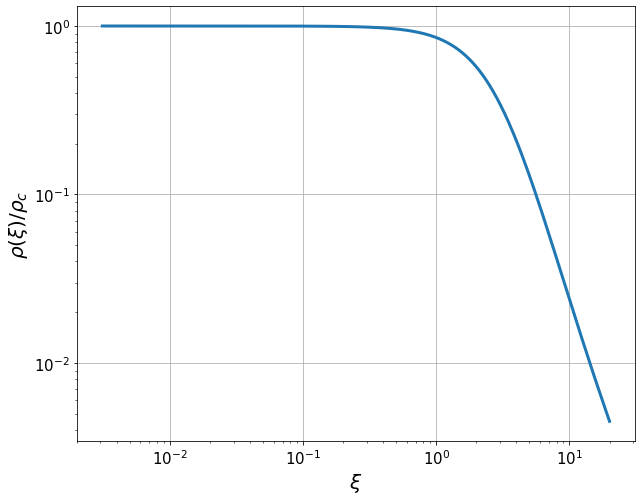

In [9]:
firsts_N = 3
SIZE_ticks = 15
SIZE_labels = 20

fig = plt.figure(figsize=(10,8))

plt.plot(csis[firsts_N:], rho_norm[firsts_N:], '-', lw=3)
plt.grid()
#plt.xticks(np.arange(14,20,1))
#plt.yticks(np.arange(0,10,2))
plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylabel(r'$\rho(\xi)/\rho_c$', size=SIZE_labels)
plt.xscale("log")
plt.yscale("log")